In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import confusion_matrix
import cv2

/home/saab/anaconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**CD3P**

In [2]:
gt_data_cd3p = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_postive_nuclei/000.npy")
same_pred_data = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Same/CD3P/000.npy")
serial_pred_data = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3P/000.npy")

In [3]:
unique_gt = np.unique(gt_data)
unique_pred = np.unique(same_pred_data)

same_gt_common_indexes = np.intersect1d(unique_gt, unique_pred)

NameError: name 'gt_data' is not defined

In [4]:
r=(gt_data_cd3p>0)*255
b=(gt_data_cd3n>0)*255
merge=cv2.merge([r,np.zeros_like(b),b])

NameError: name 'gt_data_cd3n' is not defined

In [5]:
plt.figure(figsize=(30,30))
plt.imshow(merge)

NameError: name 'merge' is not defined

<Figure size 2160x2160 with 0 Axes>

In [104]:
np.unique(merge.reshape(-1, merge.shape[-1]), axis=0, return_counts=True)

(array([[  0,   0,   0],
        [  0,   0, 255],
        [255,   0,   0]], dtype=int32),
 array([24119526,  2158124,   222318]))

In [69]:
unique_gt_indexes = unique_gt[1:]
unique_pred_indexes = unique_pred[1:]

In [70]:
unique_gt_indexes.max()

4793

In [71]:
gt = []
pred = []

for i in range(1, unique_gt_indexes.max()+1):
    
    if i in unique_gt_indexes:
        
        gt.append(1)
    
    else:
        
        gt.append(0)
    
    if i in unique_pred_indexes:
        
        pred.append(1)
    
    else:
        
        pred.append(0)

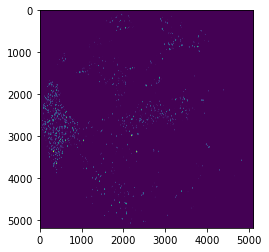

In [72]:
plt.imshow(gt_data)

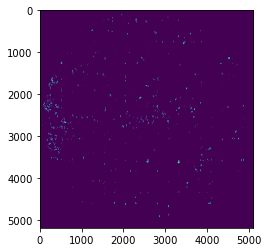

In [73]:
plt.imshow(same_pred_data)

In [74]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point2 - point1)**2))

In [75]:
conf_matrix = confusion_matrix(gt, pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2888  586]
 [ 917  402]]


In [76]:
total_deviation = 0

for i in same_gt_common_indexes:
    
    if i!=0:
    
        x = gt_data.copy()
        mask = (x != i)
        x[mask] = 0

        y=same_pred_data.copy()
        mask = (y != i)
        y[mask] = 0

        gt_i = np.argwhere(x != 0)
        same_i = np.argwhere(y != 0)

        centroid_gt_i = np.mean(gt_i, axis=0)
        centroid_same_i = np.mean(same_i, axis=0)

        distance = euclidean_distance(centroid_gt_i, centroid_same_i)

        total_deviation = total_deviation + distance
    
print("Sum of total deviation:", total_deviation)

KeyboardInterrupt: 

In [ ]:
unique_gt = np.unique(gt_data)
unique_pred = np.unique(serial_pred_data)

serial_gt_common_indexes = np.intersect1d(unique_gt, unique_pred)

In [ ]:
serial_gt_common_indexes

array([   0,   16,   20,   33,   38,   47,   55,   61,   68,   74,   84,
         88,   89,   94,   95,  115,  121,  130,  137,  140,  142,  146,
        149,  165,  168,  169,  175,  181,  187,  188,  192,  207,  209,
        213,  222,  224,  229,  230,  232,  245,  247,  253,  261,  273,
        298,  305,  307,  308,  313,  315,  316,  336,  339,  341,  342,
        348,  354,  355,  362,  370,  378,  385,  386,  393,  395,  396,
        398,  405,  411,  434,  438,  448,  450,  461,  465,  469,  473,
        474,  486,  489,  502,  513,  515,  520,  527,  531,  541,  543,
        545,  547,  551,  552,  554,  558,  567,  590,  591,  600,  605,
        606,  608,  609,  613,  615,  617,  618,  623,  630,  635,  637,
        643,  651,  658,  669,  675,  678,  681,  683,  686,  688,  691,
        692,  698,  700,  703,  711,  715,  716,  719,  720,  725,  727,
        729,  730,  731,  738,  739,  740,  756,  757,  761,  765,  771,
        772,  773,  774,  777,  778,  780,  796,  8

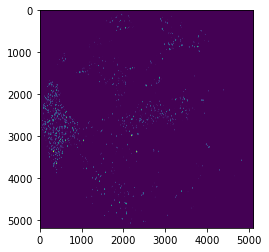

In [ ]:
plt.imshow(gt_data)

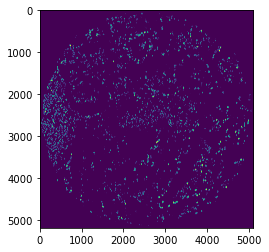

In [ ]:
plt.imshow(serial_pred_data)

In [ ]:
total_deviation = 0

for i in serial_gt_common_indexes:
    
    if i!=0:
    
        x = gt_data.copy()
        mask = (x != i)
        x[mask] = 0

        y=serial_pred_data.copy()
        mask = (y != i)
        y[mask] = 0

        gt_i = np.argwhere(x != 0)
        serial_i = np.argwhere(y != 0)

        centroid_gt_i = np.mean(gt_i, axis=0)
        centroid_serial_i = np.mean(serial_i, axis=0)

        distance = euclidean_distance(centroid_gt_i, centroid_serial_i)

        total_deviation = total_deviation + distance
    
print("Sum of total deviation:", total_deviation)

Sum of total deviation: 5630.063830684719


In [ ]:
gt_all = np.load("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/all_blue_nuclei/003.npy")
len(np.unique(gt_all))

4247

***CD3N***

In [77]:
gt_data_cd3n = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_negative_nuclei/000.npy")
same_pred_data = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Same/CD3N/000.npy")
serial_pred_data = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3N/000.npy")

In [78]:
len(np.intersect1d(np.unique(gt_data_cd3p), np.unique(gt_data_cd3n)))

1187

In [79]:
len(np.unique(gt_data_cd3p))

1320

In [80]:
unique_gt = np.unique(gt_data)
unique_pred = np.unique(same_pred_data)

same_gt_common_indexes = np.intersect1d(unique_gt, unique_pred)

In [81]:
unique_gt_indexes.max()

4793

In [82]:
unique_gt_indexes = unique_gt[1:]
unique_pred_indexes = unique_pred[1:]

In [83]:
gt = []
pred = []

for i in range(1, unique_gt_indexes.max()):
    
    if i in unique_gt_indexes:
        
        gt.append(1)
    
    else:
        
        gt.append(0)
    
    if i in unique_pred_indexes:
        
        pred.append(1)
    
    else:
        
        pred.append(0)

In [84]:
conf_matrix = confusion_matrix(gt, pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  79 3395]
 [  93 1225]]


In [85]:
same_gt_common_indexes

array([   0,    7,   11, ..., 4791, 4792, 4793], dtype=int32)

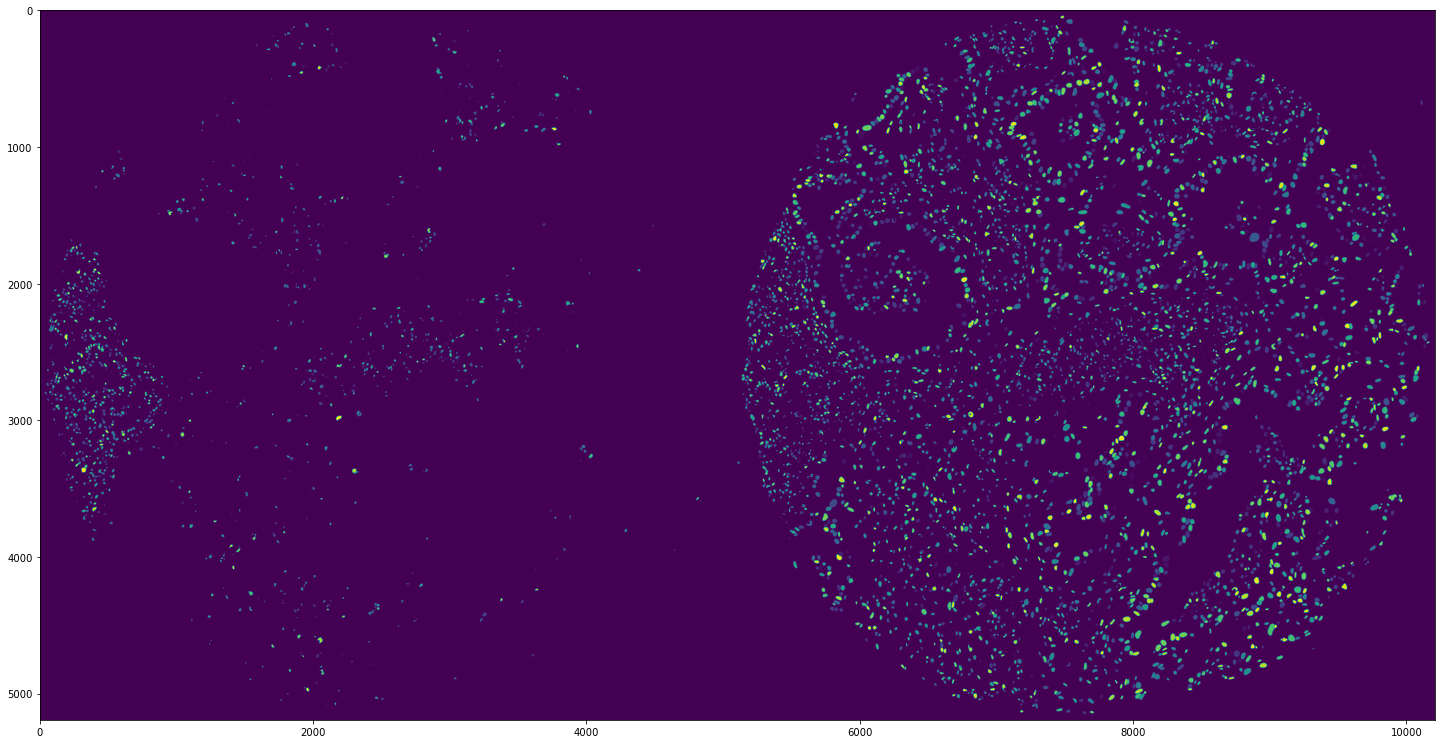

In [87]:
plt.figure(figsize=(25,25))
plt.imshow(np.hstack([gt_data_cd3p, gt_data_cd3n]))

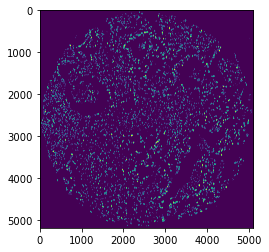

In [18]:
plt.imshow(same_pred_data)

In [19]:
total_deviation = 0

for i in same_gt_common_indexes:
    
    if i!=0:
    
        x = gt_data.copy()
        mask = (x != i)
        x[mask] = 0

        y=same_pred_data.copy()
        mask = (y != i)
        y[mask] = 0

        gt_i = np.argwhere(x != 0)
        same_i = np.argwhere(y != 0)

        centroid_gt_i = np.mean(gt_i, axis=0)
        centroid_same_i = np.mean(same_i, axis=0)

        distance = euclidean_distance(centroid_gt_i, centroid_same_i)

        total_deviation = total_deviation + distance
    
print("Sum of total deviation:", total_deviation)

Sum of total deviation: 6686.285717162147


In [20]:
unique_gt = np.unique(gt_data)
unique_pred = np.unique(serial_pred_data)

serial_gt_common_indexes = np.intersect1d(unique_gt, unique_pred)

In [21]:
serial_gt_common_indexes

array([   0,    1,    2, ..., 4790, 4792, 4794], dtype=int32)

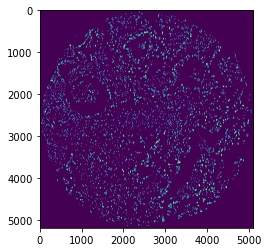

In [22]:
plt.imshow(gt_data)

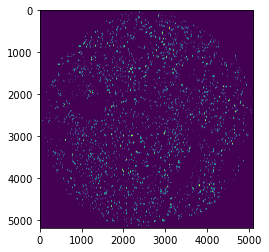

In [23]:
plt.imshow(serial_pred_data)

In [24]:
total_deviation = 0

for i in serial_gt_common_indexes:
    
    if i!=0:
    
        x = gt_data.copy()
        mask = (x != i)
        x[mask] = 0

        y=serial_pred_data.copy()
        mask = (y != i)
        y[mask] = 0

        gt_i = np.argwhere(x != 0)
        serial_i = np.argwhere(y != 0)

        centroid_gt_i = np.mean(gt_i, axis=0)
        centroid_serial_i = np.mean(serial_i, axis=0)

        distance = euclidean_distance(centroid_gt_i, centroid_serial_i)

        total_deviation = total_deviation + distance
    
print("Sum of total deviation:", total_deviation)

Sum of total deviation: 13354.226176890295


**CD3P VALIDATION SAME**

In [6]:
base_directory = "/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/"

# Specify the subdirectories for GT, Same, and Serial data
gt_directory = base_directory + "Preprocessed_Data/Validation/Validation_GT_npy/cd3_postive_nuclei/"
same_directory = base_directory + "Cell Counts/Validation Dataset/11thJan_2024/Same/CD3P/"
serial_directory = base_directory + "Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3P/"

# Use glob to get a list of all .npy files in each directory
gt_files = glob.glob(gt_directory + "*.npy")
same_files = glob.glob(same_directory + "*.npy")
serial_files = glob.glob(serial_directory + "*.npy")

In [9]:
total_deviation = 0

for gt, same, serial in zip(gt_files, same_files, serial_files):

    gt_data = np.load(gt)
    same_pred_data = np.load(same)
    serial_pred_data = np.load(serial)    

    unique_gt = np.unique(gt_data)
    unique_pred = np.unique(same_pred_data)

    same_gt_common_indexes = np.intersect1d(unique_gt, unique_pred)

    for i in same_gt_common_indexes:
        
        if i!=0:
        
            x = gt_data.copy()
            mask = (x != i)
            x[mask] = 0

            y=same_pred_data.copy()
            mask = (y != i)
            y[mask] = 0

            gt_i = np.argwhere(x != 0)
            same_i = np.argwhere(y != 0)

            centroid_gt_i = np.mean(gt_i, axis=0)
            centroid_same_i = np.mean(same_i, axis=0)

            distance = euclidean_distance(centroid_gt_i, centroid_same_i)

            total_deviation = total_deviation + distance
        
print("Sum of total deviation of CD3P Validation Same:", total_deviation)